In [2]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import numpy as np

In [ ]:
# # Set up client credentials
# client_id = '333b068e36a9489a9d53970bc93570ce'
# client_secret = '7532915bd0224ecda66ab54d720b450f'

# credentials = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

In [ ]:
# # Authenticate with the Spotify Web API
# sp = spotipy.Spotify(client_credentials_manager=credentials)

# def get_artist_genres(artist_id):
#     artist = sp.artist(artist_id)
#     return artist['genres']

In [ ]:
# # Set up authorization flow
# scope = "user-library-read"
# sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
#     client_id="333b068e36a9489a9d53970bc93570ce",
#     client_secret="7532915bd0224ecda66ab54d720b450f",
#     redirect_uri="http://localhost:8000",
#     scope=scope))

In [ ]:
# # Get all liked tracks
# offset = 0
# limit = 50

# all_tracks = []
# while True:
#     results = sp.current_user_saved_tracks(offset=offset, limit=limit)
#     all_tracks.extend(results['items'])
#     if len(results['items']) < limit:
#         break
#     offset += limit

In [ ]:
# tracks_data = []
# for track in all_tracks:
#     track_data = {}
#     track_data["track_name"] = track["track"]["name"]
#     track_data["artist_name"] = track["track"]["artists"][0]["name"]
#     track_data["artist_id"] = track["track"]["artists"][0]["id"]
#     track_data["album_name"] = track["track"]["album"]["name"]
#     track_data["release_date"] = track["track"]["album"]["release_date"][:4]  # Extract year from release date
#     track_data["length"] = track["track"]["duration_ms"]
#     track_data["popularity"] = track["track"]["popularity"]
#     track_data["id"] = track["track"]["id"]
#     audio_features = sp.audio_features(track["track"]["id"])[0]
#     track_data["acousticness"] = audio_features["acousticness"]
#     track_data["danceability"] = audio_features["danceability"]
#     track_data["energy"] = audio_features["energy"]
#     track_data["instrumentalness"] = audio_features["instrumentalness"]
#     track_data["key"] = audio_features["key"]
#     track_data["liveness"] = audio_features["liveness"]
#     track_data["loudness"] = audio_features["loudness"]
#     track_data["mode"] = audio_features["mode"]
#     track_data["speechiness"] = audio_features["speechiness"]
#     track_data["tempo"] = audio_features["tempo"]
#     track_data["time_signature"] = audio_features["time_signature"]
#     tracks_data.append(track_data)

In [ ]:
df = pd.DataFrame(tracks_data)


In [ ]:
# df.to_csv("spotify_liked_genre.csv", index=False)

In [13]:
df = pd.read_csv("spotify_liked_genres.csv")
print(df.head())

       track_name   artist_name               artist_id  \
0   Miss The Days        SBTRKT  1O10apSOoAPjOu6UhUNmeI   
1  Turning You On    Never Dull  2u3rmzZC0psTER2sDfUebm   
2            Otis         JAY-Z  3nFkdlSjzX9mRTtwJOzDYB   
3         Matilda  Harry Styles  6KImCVD70vtIoJWnq6nGn3   
4     Quarterback       Wallows  0NIPkIjTV8mB795yEIiPYL   

                  album_name  release_date  length  popularity  \
0              Miss The Days          2022  220650           0   
1     VA Compilation, Vol. 2          2018  405245           0   
2  Watch The Throne (Deluxe)          2011  178213          72   
3              Harry's House          2022  245964          83   
4                Quarterback          2021  180386          63   

                       id  acousticness  danceability  energy  \
0  4TdBkfjotcNZWAGI2xgxh9       0.14800         0.522   0.934   
1  0CgQOzaA7J99vQpdjIcaLS       0.00911         0.794   0.784   
2  6vegnfDS8DAEaCqWaPYGPy       0.55200         0.754

In [14]:
print(df.describe())

       release_date        length   popularity  acousticness  danceability  \
count   4394.000000  4.394000e+03  4394.000000   4394.000000   4394.000000   
mean    1997.075330  2.486498e+05    22.810196      0.310564      0.591557   
std      160.505793  1.435849e+05    24.537310      0.315147      0.183040   
min        0.000000  0.000000e+00     0.000000      0.000001      0.000000   
25%     2007.000000  1.803860e+05     0.000000      0.032000      0.467000   
50%     2016.000000  2.260795e+05    13.000000      0.190000      0.607000   
75%     2018.000000  2.916182e+05    43.000000      0.543750      0.734000   
max     2022.000000  3.815786e+06    91.000000      0.996000      0.980000   

            energy  instrumentalness          key     liveness     loudness  \
count  4394.000000       4394.000000  4394.000000  4394.000000  4394.000000   
mean      0.587564          0.232374     5.267865     0.202624    -9.428974   
std       0.229860          0.342084     3.648190     0.1701

In [9]:
unique_artist_ids = df['artist_id'].unique()

artist_genres = {}
for artist_id in unique_artist_ids:
    genres = get_artist_genres(artist_id)
    artist_genres[artist_id] = genres

In [10]:
df['genres'] = df['artist_id'].map(artist_genres)

NameError: name 'artist_genres' is not defined

In [11]:
print(df.head())

       track_name   artist_name               artist_id  \
0   Miss The Days        SBTRKT  1O10apSOoAPjOu6UhUNmeI   
1  Turning You On    Never Dull  2u3rmzZC0psTER2sDfUebm   
2            Otis         JAY-Z  3nFkdlSjzX9mRTtwJOzDYB   
3         Matilda  Harry Styles  6KImCVD70vtIoJWnq6nGn3   
4     Quarterback       Wallows  0NIPkIjTV8mB795yEIiPYL   

                  album_name  release_date  length  popularity  \
0              Miss The Days          2022  220650           0   
1     VA Compilation, Vol. 2          2018  405245           0   
2  Watch The Throne (Deluxe)          2011  178213          72   
3              Harry's House          2022  245964          83   
4                Quarterback          2021  180386          63   

                       id  acousticness  danceability  energy  \
0  4TdBkfjotcNZWAGI2xgxh9       0.14800         0.522   0.934   
1  0CgQOzaA7J99vQpdjIcaLS       0.00911         0.794   0.784   
2  6vegnfDS8DAEaCqWaPYGPy       0.55200         0.754

In [17]:
from collections import Counter

In [36]:
genre_counter = Counter()
for genres in df['genres']:
    genre_counter.update(genres)

most_common_genres = genre_counter.most_common(10)
print("Most common genres:")
for genre, count in most_common_genres:
    print(f"{genre}: {count}")

Most common genres:
': 32444
 : 27269
o: 15904
e: 15087
a: 13932
p: 13663
r: 12904
i: 12861
,: 12193
n: 9730


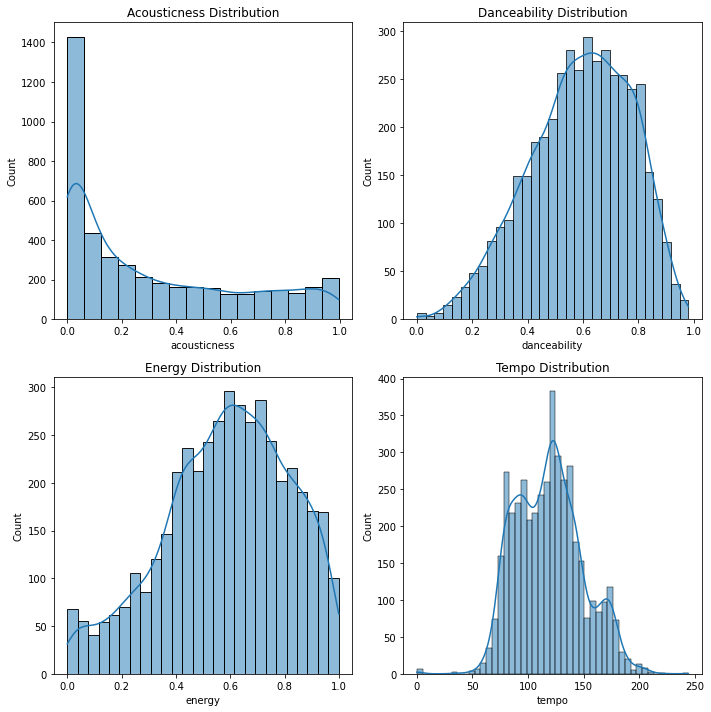

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False)

# Plot acousticness distribution
sns.histplot(data=df, x="acousticness", kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Acousticness Distribution")

# Plot danceability distribution
sns.histplot(data=df, x="danceability", kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Danceability Distribution")

# Plot energy distribution
sns.histplot(data=df, x="energy", kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Energy Distribution")

# Plot tempo distribution
sns.histplot(data=df, x="tempo", kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Tempo Distribution")

plt.tight_layout()
plt.show()


In [20]:
artist_counts = df['artist_name'].value_counts().head(10)
print("Most popular artists:")
print(artist_counts)


Most popular artists:
Kendrick Lamar               53
Kanye West                   44
The Smiths                   37
Madlib                       36
Frank Ocean                  36
Tyler, The Creator           35
The WRLDFMS Tony Williams    32
Travis Scott                 31
Freddie Gibbs                30
The Beach Boys               27
Name: artist_name, dtype: int64


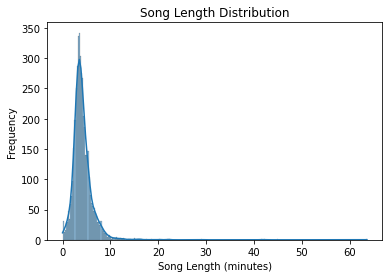

In [21]:
# Convert length from milliseconds to minutes
df['length_minutes'] = df['length'] / 60000

# Plot the distribution of song lengths
sns.histplot(data=df, x='length_minutes', kde=True)
plt.title("Song Length Distribution")
plt.xlabel("Song Length (minutes)")
plt.ylabel("Frequency")
plt.show()


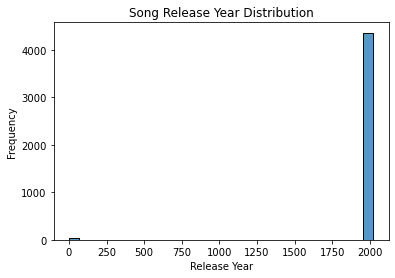

In [22]:
# Plot the distribution of song release years
sns.histplot(data=df, x='release_date', kde=False, bins=30)
plt.title("Song Release Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.show()



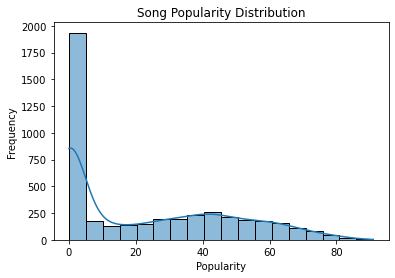

In [23]:
sns.histplot(data=df, x='popularity', kde=True)
plt.title("Song Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()


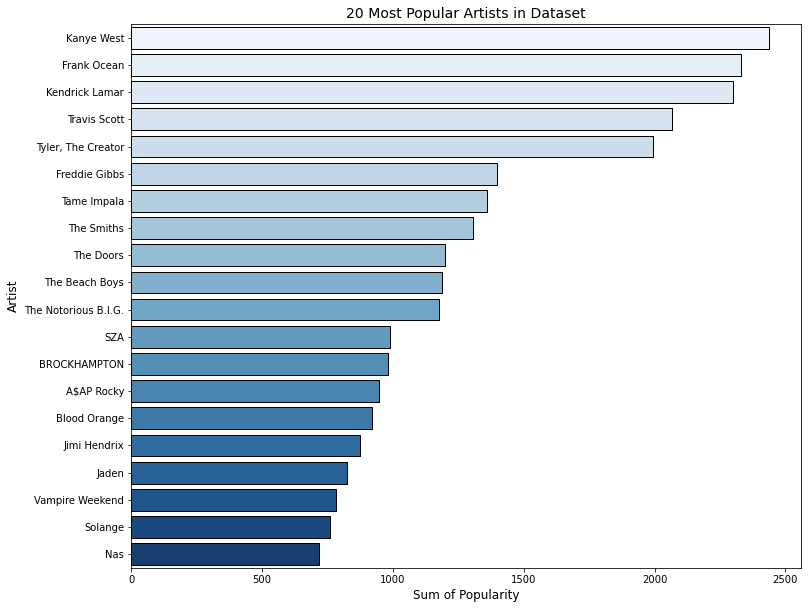

In [24]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 10))
lead_artists = df.groupby('artist_name')['popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Blues", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', fontsize=12)
ax.set_ylabel('Artist', fontsize=12)
ax.set_title('20 Most Popular Artists in Dataset', fontsize=14)
plt.show()
